In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pickle as pkl

import flamedisx as fd

/Users/Robert/anaconda3/envs/flamedisx/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/Robert/anaconda3/envs/flamedisx/lib/python3.11/site-packages/wimprates/__init__.py:6: UserWarning: Default WIMP parameters are changed in accordance with https://arxiv.org/abs/2105.00599 (github.com/JelleAalbers/wimprates/pull/14)
  warnings.warn(


In [5]:
def get_disco_bands(exposure='40ty'):
    directory = f'outputs/CEvNS_disco_60t_{exposure}'
    
    disco_sigs = pkl.load(open(f'{directory}/disco_sigs_0.pkl', 'rb'))

    intervals = fd.IntervalCalculator(signal_source_names=['CEvNS_other'],
                                      stat_dists=disco_sigs)

    bands, mus = intervals.get_bands_discovery()
    
    return bands['CEvNS_other'][mus['CEvNS_other'][0]]

In [6]:
exposures_dict = {'40ty': 40, '60ty': 60, '80ty': 80,
                  '100ty': 100, '125ty': 125, '150ty': 150,
                  '200ty': 200, '300ty': 300, '400ty': 400,
                  '500ty': 500}

In [7]:
expsoures = []
bands = []
for exposure_key, exposure_value in exposures_dict.items():
    expsoures.append(exposure_value)
    bands.append(get_disco_bands(exposure=exposure_key))

(0.0, 15.0)

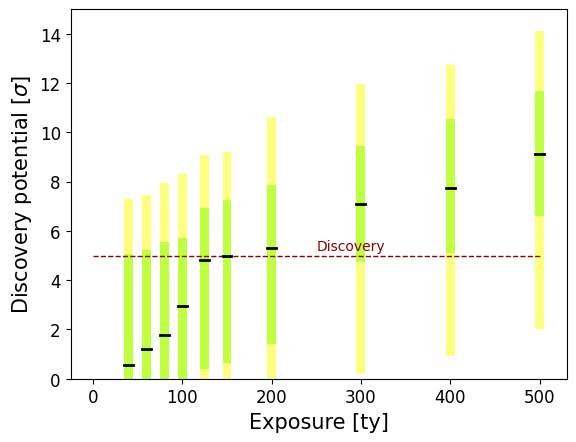

In [8]:
delta = 5

plt.hlines(5., 0., 500., color='darkred', linestyle='--', linewidth=1)
plt.text(250, 5.2, 'Discovery', color='darkred')

for exposure, band in zip(expsoures, bands):

    plt.plot([exposure-delta, exposure+delta],
             2*[band[0]],
             color='k', linewidth=2)
    plt.fill_between([exposure-delta, exposure+delta],
                     2*[band[-1]], 2*[band[1]],
                     facecolor='#00ff00', alpha=0.5)
    plt.fill_between([exposure-delta, exposure+delta],
                     2*[band[-2]], 2*[band[2]],
                     facecolor='#ffff00', alpha=0.5)


plt.xlabel("Exposure [ty]")
plt.ylabel("Discovery potential [$\sigma$]")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax = plt.gca()
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)

plt.ylim (0., 15.)